In [81]:
import os
import pickle
import numpy as np
import networkx as nx
import statistics as st
import matplotlib.pyplot as plt
import fa2
import powerlaw
import pandas as pd

from datautils import datautils

loader = datautils.Loader()
loader.load("data/characters/")
data = loader.to_dataframe()
loader.drop()

GRAPH_PATH = 'graph/universe_epis_1.pickle'
GRAPH_PATH_EPISODES = 'graph/universe_episodes.pickle'

import community
from community import community_louvain 

import matplotlib.cm as cm 



In [51]:
data

,Name,DisplayName,Content,Crosslinks,Species,Gender,Affiliation(s),Homeworld,Died
0,%22Blue%22_Imcrix,"""Blue"" Imcrix","""Blue"" Imcrix was an infamous male Taloron cri...","[Star_Wars_Legends, Taloron, Gender/Legends, C...",Taloron,Male,NaN,NaN,NaN
1,%22Fugitive%22_Fod,"""Fugitive"" Fod","""Fugitive"" Fod was a male Yuzzum from Endor wh...","[Star_Wars_Legends, Endor/Legends, Yuzzum/Lege...",Yuzzum,Male,NaN,Endor,NaN
2,%22Shady%22_Pers,"""Shady"" Pers","""Shady"" Pers was a male Human smuggler living ...","[Star_Wars_Legends, Kashyyyk/Legends, Human/Le...",Human,Male,[Myyydril],Kashyyyk,NaN
3,%27Ndranth_Poussan,'Ndranth Poussan,'Ndranth Poussan was a Human male starfighter ...,"[Star_Wars_Legends, Wookieepedia:Good_articles...",Human,Male,"[Agamar Resistance, Alliance to Restore the Re...",Agamar,"[1 BBY, near Brigia]"
4,0761,0761,0761 was a stormtrooper who was stationed on C...,"[Star_Wars_Legends, 5_ABY/Legends, Ciutric_IV,...",Human,Male,"[Galactic EmpireStormtrooper Corps, Stormtroop...",NaN,"[5 ABY, Ciutric IV]"
...,...,...,...,...,...,...,...,...,...
29430,Zzzanmxl,Zzzanmxl,Zzzanmxl was the leader of a band of Zanibar m...,"[Star_Wars_Legends, Xo, Zanibar, Gender/Legend...",Zanibar,Male,NaN,Xo,NaN
29431,Zzzs,Zzzs,Zzzs was a Southern Mustafarian member of Fath...,"[Canon, Wookieepedia:Good_articles, Wookieeped...",Mustafarian,NaN,[Kkkt's clan],NaN,NaN
29432,B%27Crevnis,b'Crevnis,B'Crevnis was a large male Pho Ph'eahian who w...,"[Star_Wars_Legends, Pho_Ph%27eahian, Gender/Le...",Pho Ph'eahian,Male,"[Galactic Republic, Outbound Flight Project, O...",NaN,NaN
29433,Bel-dar-Nolek,bel-dar-Nolek,bel-dar-Nolek was a Human male serving as dire...,"[Star_Wars_Legends, Obroa-skai/Legends, Human/...",Human,Male,"[Galactic Senate, Obroan Institute]",Obroa-skai,NaN


In [52]:
episodes = [
    "Star_Wars:_Episode_I_The_Phantom_Menace",
    "Star_Wars:_Episode_II_Attack_of_the_Clones",
    "Star_Wars:_Episode_III_Revenge_of_the_Sith",
    "Star_Wars:_Episode_IV_A_New_Hope",
    "Star_Wars:_Episode_V_The_Empire_Strikes_Back",
    "Star_Wars:_Episode_VI_Return_of_the_Jedi",
    "Star_Wars:_Episode_VII_The_Force_Awakens",
    "Star_Wars:_Episode_VIII_The_Last_Jedi",
    "Star_Wars:_Episode_IX_The_Rise_of_Skywalker",
]

characters_in_episodes = []

for _, char in data.iterrows():
    # iterate over records
    for crosslink in char.Crosslinks:
        if crosslink in episodes:
            # append only characters which have crosslink to one of the episodes
            characters_in_episodes.append(char.Name)
            break

In [53]:
len(characters_in_episodes)

3392

In [54]:
episodes_characters_data = data.loc[data['Name'].isin(characters_in_episodes)]
episodes_characters_data

,Name,DisplayName,Content,Crosslinks,Species,Gender,Affiliation(s),Homeworld,Died
5,1047,1047,1047 was a Human male stormtrooper who served ...,"[Star_Wars_Legends, Wookieepedia:Good_articles...",Human,Male,"[Galactic Empire, Zeta Squadron, Zeta Squadron]",NaN,NaN
7,1138_(First_Order),1138 (First Order),1138 was a human male stormtrooper who served ...,"[Canon, 1138, Special:Upload, Human, Gender, F...",Human,Male,"[First Order, Stormtrooper Corps, Stormtrooper...",NaN,NaN
28,4/163,4/163,CT-4/163 was a clone trooper in the Grand Army...,"[Star_Wars_Legends, Kamino/Legends, Human/Lege...",Human,Male,"[Galactic Republic, Grand Army of the Republic...",Kamino,NaN
30,5/373,5/373,5/373 was a clone trooper in the Grand Army of...,"[Star_Wars_Legends, Wookieepedia:Sourcing, Spe...",Human,Male,"[Galactic RepublicGrand Army of the Republic, ...",Kamino,NaN
32,6/298,6/298,6/298 was a clone trooper in the Grand Army of...,"[Star_Wars_Legends, Kamino/Legends, 32_BBY/Leg...",Human,Male,"[Galactic Republic, Grand Army of the Republic...",Kamino,NaN
...,...,...,...,...,...,...,...,...,...
29409,Zutmore,Zutmore,Zutmore was a Snivvian from Cadomai Prime know...,"[Star_Wars_Legends, Cadomai_Prime/Legends, Sni...",Snivvian,Female,NaN,Cadomai Prime,NaN
29410,Zutton,Zutton,Zutton was a Snivvian male who was an artist w...,"[Canon, Zutton, Zutton/Legends, Snivvian, Gend...",Snivvian,Male,NaN,NaN,NaN
29414,Zuvio,Zuvio,Zuvio was a Kyuzo male lawman who lived approx...,"[Canon, Better_the_Devil_You_Know,_Part_I, Des...",Kyuzo,Male,[Niima Outpost Militia],Phatrong,NaN
29416,Zygli_Bruss,Zygli Bruss,Zygli Bruss was a Candovantan with ultraviolet...,"[Canon, Candovant, 34_ABY, Hosnian_Prime, Cand...",Candovantan,NaN,"[New Republic, Galactic Senate, Galactic Senate]",Candovant,"[34 ABY, Hosnian Prime]"


In [55]:
if os.path.exists(GRAPH_PATH_EPISODES):
    with open(GRAPH_PATH_EPISODES, 'rb') as f:
        Universe_episodes = pickle.load(f)
else:
    # initialize universe directional graph
    Universe_episodes = nx.DiGraph()
    for _, character in episodes_characters_data.iterrows():
        # add node with metadata for each character
        Universe_episodes.add_node(character.Name)
        for connection in character.Crosslinks:
            if connection in episodes_characters_data.Name.values:
                # add edge between character and its connection if it's not a self loop
                if connection != character.Name:
                    Universe_episodes.add_edge(character.Name, connection)

    with open(GRAPH_PATH, 'wb') as f:
        pickle.dump(Universe_episodes, f)

In [56]:
print(f"Number of nodes: {len(Universe_episodes.nodes)}")
print(f"Number of links: {len(Universe_episodes.edges)}")

Number of nodes: 3392
Number of links: 15621


In [ ]:
largest_component_episodes = sorted(nx.weakly_connected_components(Universe_episodes), key=len, reverse=True)[0]
Undirected_universe_lc_episodes = Universe_episodes.subgraph(largest_component_episodes).to_undirected()

largest_component_episodes

In [60]:
# use Force Atlas 2

FA_POSITIONS = "data/positions_episodes.pickle"
# load pickle with pre-calculated positions if present
if os.path.exists(FA_POSITIONS):
    with open(FA_POSITIONS, "rb") as rbfile:
        positions = pickle.load(rbfile)
else:
    positions = fa2.ForceAtlas2().forceatlas2_networkx_layout(Undirected_universe_lc_episodes, pos=None, iterations=2000)
    # save to pickle for later use
    with open(FA_POSITIONS, "wb") as wbfile:
        pickle.dump(positions, wbfile)

100%|██████████| 2000/2000 [00:44<00:00, 44.50it/s]

BarnesHut Approximation  took  21.66  seconds
Repulsion forces  took  21.80  seconds
Gravitational forces  took  0.12  seconds
Attraction forces  took  0.14  seconds
AdjustSpeedAndApplyForces step  took  0.69  seconds


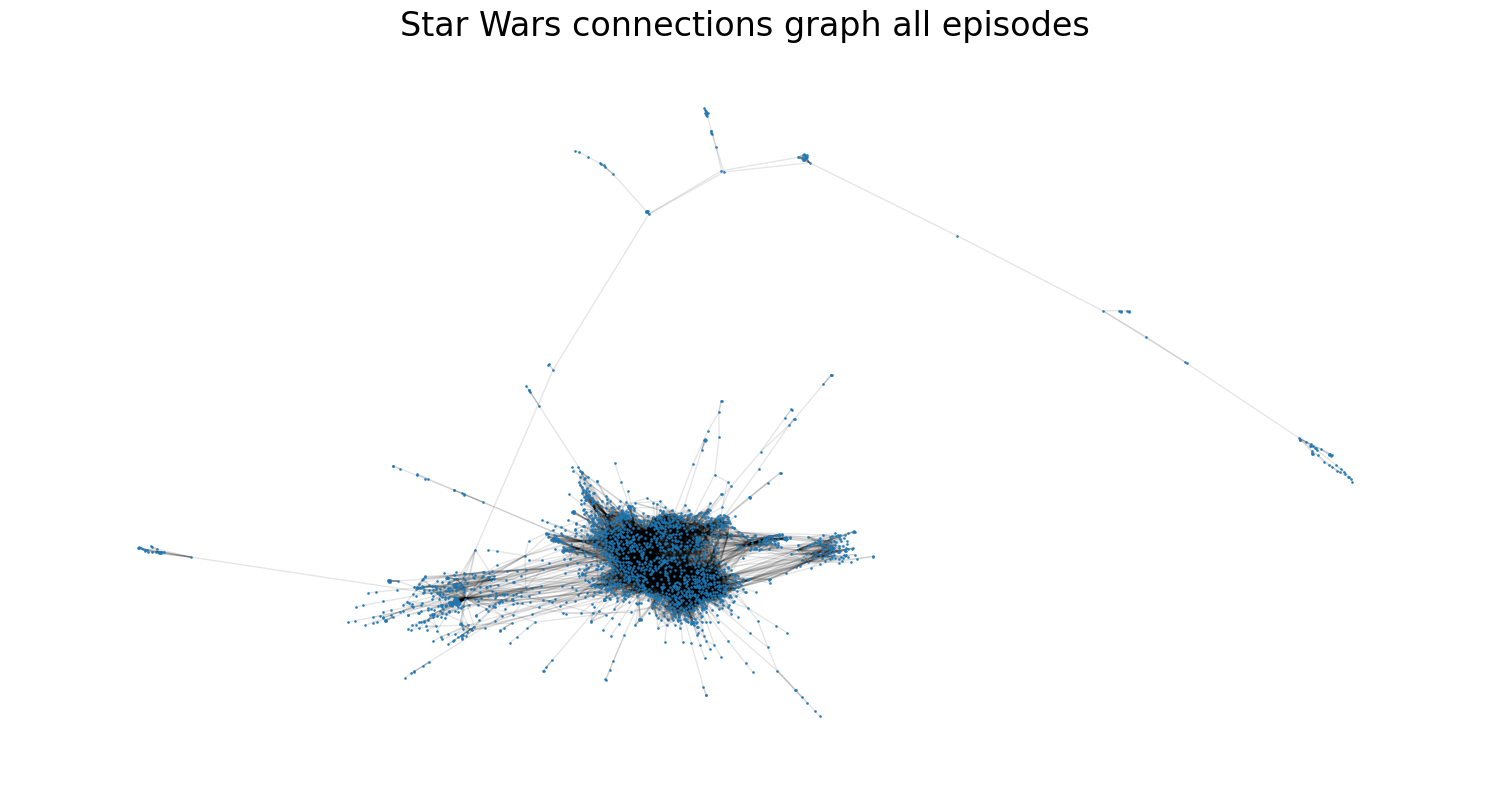

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
nx.draw_networkx_nodes(Undirected_universe_lc_episodes, positions, node_size=0.9, alpha=0.85, ax=ax)
nx.draw_networkx_edges(Undirected_universe_lc_episodes, positions, alpha=0.1, ax=ax)
ax.set_title("Star Wars connections graph all episodes", size=24)
ax.axis("off")
# plt.show()
plt.tight_layout()
#plt.savefig('starwars_network.png')

### Comunities

In [62]:
universe = Universe_episodes.to_undirected()

In [63]:
episodes_subgraph = universe.subgraph(node for node in universe.nodes() if universe.degree(node) > 0)
episodes_subgraph = episodes_subgraph.subgraph(sorted(nx.connected_components(episodes_subgraph), key=len, reverse=True)[0])
degrees = [deg for _, deg in episodes_subgraph.degree()]

In [ ]:
# compute the best partition 
partition = community_louvain.best_partition(episodes_subgraph)
# compute graph positions
positions_communities = fa2.ForceAtlas2(strongGravityMode=True).forceatlas2_networkx_layout(episodes_subgraph, pos=None, iterations=2000)

In [84]:
POSITIONS_COMMUNITIES = "data/positions_communities.pickle"
# load pickle with pre-calculated positions if present
if os.path.exists(POSITIONS_COMMUNITIES ):
    with open(POSITIONS_COMMUNITIES , "rb") as rbfile:
        positions = pickle.load(rbfile)
else:
    positions_communities = fa2.ForceAtlas2(strongGravityMode=True).forceatlas2_networkx_layout(episodes_subgraph, pos=None, iterations=2000)
    # save to pickle for later use
    with open(POSITIONS_COMMUNITIES, "wb") as wbfile:
        pickle.dump(positions_communities, wbfile)

100%|██████████| 2000/2000 [00:30<00:00, 64.67it/s]

BarnesHut Approximation  took  20.52  seconds
Repulsion forces  took  9.06  seconds
Gravitational forces  took  0.02  seconds
Attraction forces  took  0.13  seconds
AdjustSpeedAndApplyForces step  took  0.69  seconds


In [85]:
# modularity 
mod = community_louvain.modularity(partition, episodes_subgraph, weight='weight')
mod

0.5414210336816326

In [86]:
node_size = [episodes_subgraph.degree(node) for node in episodes_subgraph.nodes]

In [87]:
# number of communities
set(partition.values())

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24}

In [88]:
count = Counter(partition.values())
print(count)

Counter({4: 526, 1: 424, 23: 335, 6: 260, 18: 167, 8: 130, 5: 122, 10: 65, 24: 50, 13: 46, 0: 23, 9: 22, 11: 16, 2: 13, 22: 13, 12: 12, 20: 11, 7: 10, 14: 5, 21: 5, 3: 5, 15: 5, 19: 4, 16: 4, 17: 3})


<BarContainer object of 25 artists>

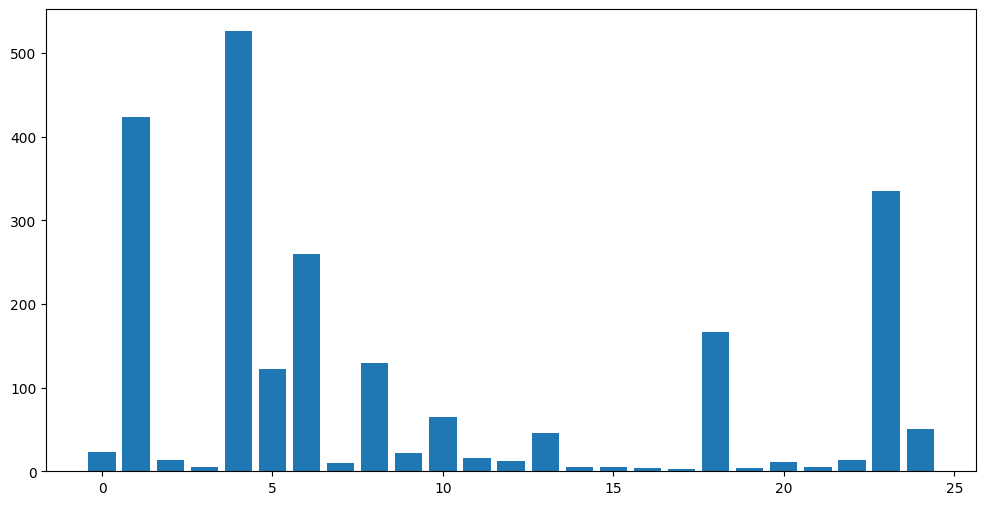

In [89]:
plt.figure(figsize = (12,6))
plt.bar(count.keys(), count.values())

In [114]:
node_degrees = sorted(episodes_subgraph.degree, key=lambda x: x[1], reverse=True)
labels = [(name[0], data[data.Name == name[0]].DisplayName.values[0]) for name in node_degrees[:10]]

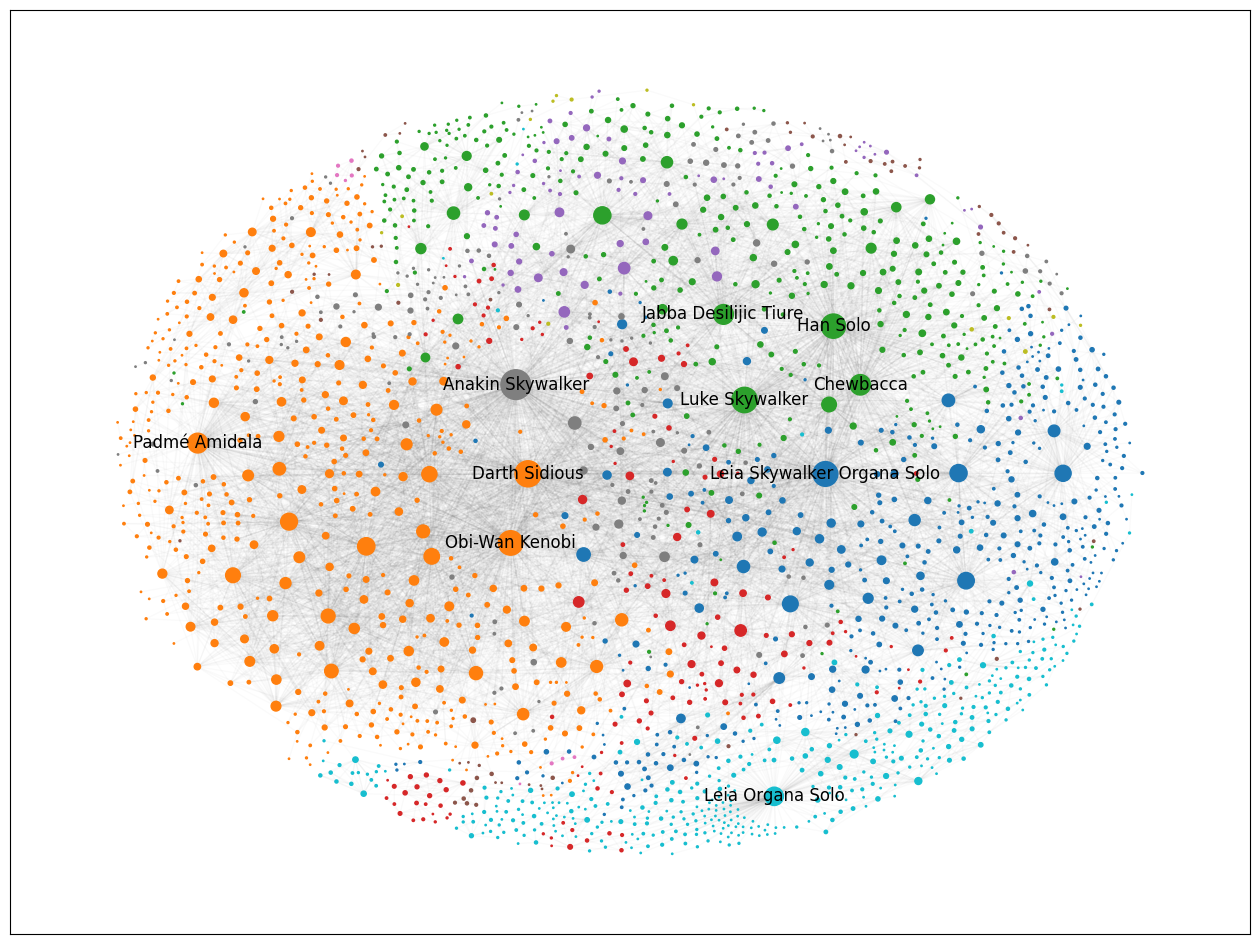

In [117]:
plt.figure(figsize=(16, 12))
cmap = cm.get_cmap("tab10", max(partition.values()) + 1)
nx.draw_networkx_nodes(
    episodes_subgraph, positions, node_size=node_size,
    cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(episodes_subgraph, positions, alpha=0.02)
nx.draw_networkx_labels(episodes_subgraph, positions, labels=dict(labels), font_color="black")
plt.show()

### Division into individual movies

In [6]:
episodes = [
    "Star_Wars:_Episode_I_The_Phantom_Menace",
    "Star_Wars:_Episode_II_Attack_of_the_Clones",
    "Star_Wars:_Episode_III_Revenge_of_the_Sith",
    "Star_Wars:_Episode_IV_A_New_Hope",
    "Star_Wars:_Episode_V_The_Empire_Strikes_Back",
    "Star_Wars:_Episode_VI_Return_of_the_Jedi",
    "Star_Wars:_Episode_VII_The_Force_Awakens",
    "Star_Wars:_Episode_VIII_The_Last_Jedi",
    "Star_Wars:_Episode_IX_The_Rise_of_Skywalker",
]


In [7]:
episodes[0]

'Star_Wars:_Episode_I_The_Phantom_Menace'

In [8]:
characters_in_episodes = datautils.find_rows_with(episodes[0], data, lookup_column="Crosslinks", match_column="Name")
episode_1_characters_data = data.loc[data['Name'].isin(characters_in_episodes)]
len(episode_1_characters_data)

366

In [11]:
if os.path.exists(GRAPH_PATH):
    with open(GRAPH_PATH, 'rb') as f:
        Universe_epis_1 = pickle.load(f)
else:
    # initialize universe directional graph
    Universe_epis_1 = nx.DiGraph()
    for _, character in episode_1_characters_data.iterrows():
        # add node with metadata for each character
        Universe_epis_1.add_node(character.Name)
        for connection in character.Crosslinks:
            if connection in episode_1_characters_data.Name.values:
                # add edge between character and its connection if it's not a self loop
                if connection != character.Name:
                    Universe_epis_1.add_edge(character.Name, connection)

    with open(GRAPH_PATH, 'wb') as f:
        pickle.dump(Universe_epis_1, f)

In [12]:
print(f"Number of nodes: {len(Universe_epis_1.nodes)}")
print(f"Number of links: {len(Universe_epis_1.edges)}")

Number of nodes: 366
Number of links: 1953


In [ ]:
largest_component_epis_1 = sorted(nx.weakly_connected_components(Universe_epis_1), key=len, reverse=True)[0]
Undirected_universe_lc_epis_1 = Universe_epis_1.subgraph(largest_component_epis_1).to_undirected()

largest_component_epis_1

In [15]:
# use Force Atlas 2

FA_POSITIONS = "data/positions_epis_1.pickle"
# load pickle with pre-calculated positions if present
if os.path.exists(FA_POSITIONS):
    with open(FA_POSITIONS, "rb") as rbfile:
        positions = pickle.load(rbfile)
else:
    positions = fa2.ForceAtlas2().forceatlas2_networkx_layout(Undirected_universe_lc_epis_1, pos=None, iterations=2000)
    # save to pickle for later use
    with open(FA_POSITIONS, "wb") as wbfile:
        pickle.dump(positions, wbfile)

100%|██████████| 2000/2000 [00:01<00:00, 1559.19it/s]

BarnesHut Approximation  took  0.36  seconds
Repulsion forces  took  0.78  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.07  seconds


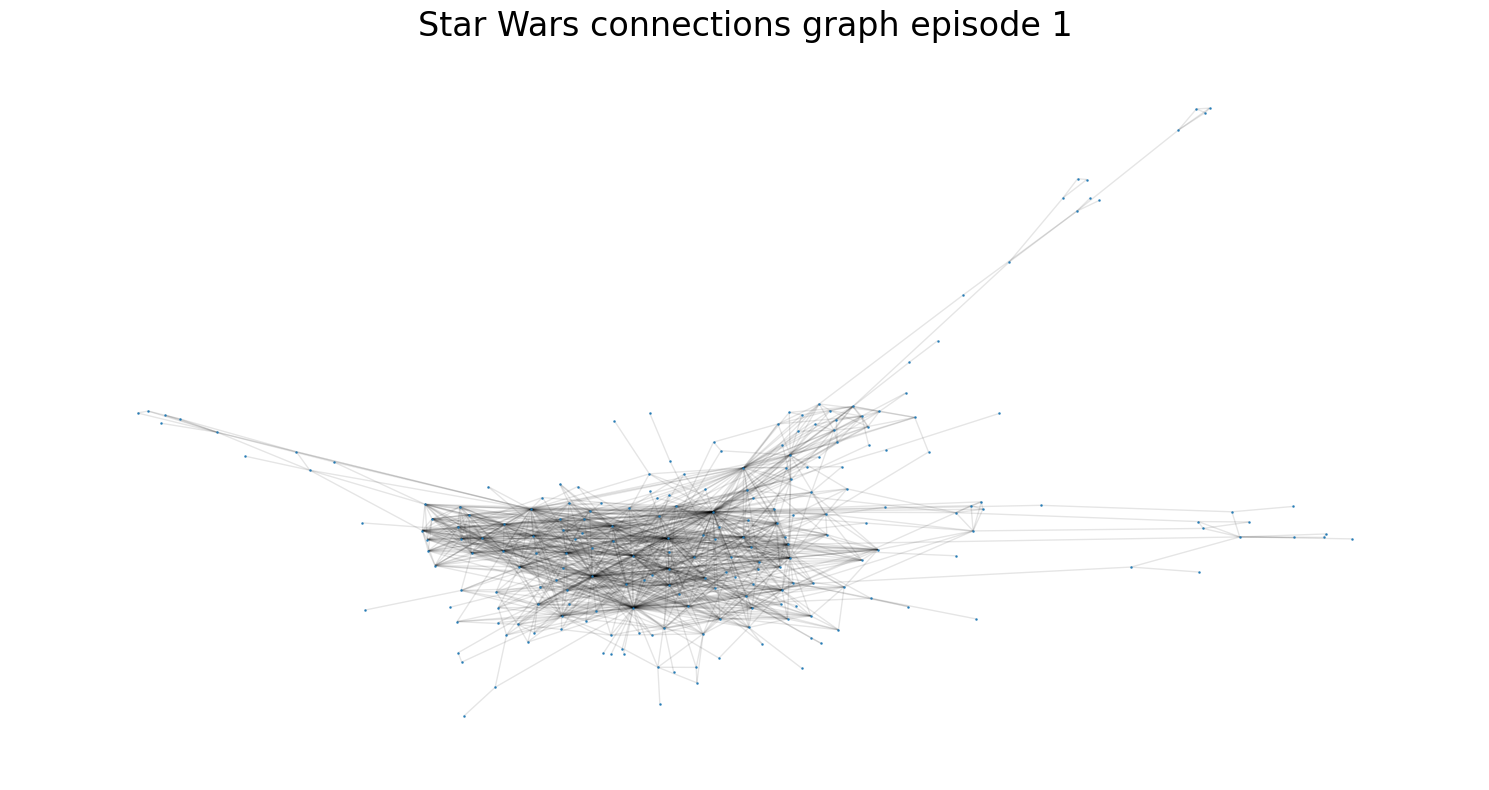

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
nx.draw_networkx_nodes(Undirected_universe_lc_epis_1, positions, node_size=0.7, alpha=0.85, ax=ax)
nx.draw_networkx_edges(Undirected_universe_lc_epis_1, positions, alpha=0.1, ax=ax)
ax.set_title("Star Wars connections graph episode 1", size=24)
ax.axis("off")
# plt.show()
plt.tight_layout()
#plt.savefig('starwars_network.png')

In [ ]:
characters_in_episodes = datautils.find_rows_with(episodes[1], data, lookup_column="Crosslinks", match_column="Name")
episode_2_characters_data = data.loc[data['Name'].isin(characters_in_episodes)]
len(episode_2_characters_data)

In [ ]:
characters_in_episodes = datautils.find_rows_with(episodes[2], data, lookup_column="Crosslinks", match_column="Name")
episode_3_characters_data = data.loc[data['Name'].isin(characters_in_episodes)]
len(episode_3_characters_data)

In [ ]:
characters_in_episodes = datautils.find_rows_with(episodes[3], data, lookup_column="Crosslinks", match_column="Name")
episode_4_characters_data = data.loc[data['Name'].isin(characters_in_episodes)]
len(episode_4_characters_data)

In [ ]:
characters_in_episodes = datautils.find_rows_with(episodes[4], data, lookup_column="Crosslinks", match_column="Name")
episode_5_characters_data = data.loc[data['Name'].isin(characters_in_episodes)]
len(episode_5_characters_data)

In [ ]:
characters_in_episodes = datautils.find_rows_with(episodes[5], data, lookup_column="Crosslinks", match_column="Name")
episode_6_characters_data = data.loc[data['Name'].isin(characters_in_episodes)]
len(episode_6_characters_data)

In [ ]:
characters_in_episodes = datautils.find_rows_with(episodes[6], data, lookup_column="Crosslinks", match_column="Name")
episode_7_characters_data = data.loc[data['Name'].isin(characters_in_episodes)]
len(episode_7_characters_data)

In [ ]:
characters_in_episodes = datautils.find_rows_with(episodes[7], data, lookup_column="Crosslinks", match_column="Name")
episode_8_characters_data = data.loc[data['Name'].isin(characters_in_episodes)]
len(episode_8_characters_data)

In [ ]:
characters_in_episodes = datautils.find_rows_with(episodes[8], data, lookup_column="Crosslinks", match_column="Name")
episode_9_characters_data = data.loc[data['Name'].isin(characters_in_episodes)]
len(episode_9_characters_data)